In [1]:
import pandas as pd

from tqdm import tqdm

In [2]:
freq_flyer = pd.read_csv('FrequentFlyerForum-Profiles.csv', index_col=0, sep=';')
freq_flyer.dropna(inplace=True)
freq_flyer

,firstName_2,lastName_2,sex_2,cardNumber_2,date_2,arrival_2,flight_2,departure_2
nickName_2,,,,,,,,
FrequentFlyer2,NAZAR,ZYKOV,Male,SU 658121632,2017-08-31,NRT,MU8705,PVG
FrequentFlyer2,NAZAR,ZYKOV,Male,SU 658121632,2017-08-11,TPE,GA9995,SIN
FrequentFlyer2,NAZAR,ZYKOV,Male,SU 658121632,2017-08-23,NRT,CI9902,TPE
FrequentFlyer2,NAZAR,ZYKOV,Male,SU 658121632,2017-01-04,VVO,SU5615,PKC
FrequentFlyer2,NAZAR,ZYKOV,Male,SU 658121632,2017-10-17,CAN,CZ3320,AQG
...,...,...,...,...,...,...,...,...
FrequentFlyer99995,STEFANIYA,BONDAREVA,Female,FB 18721601,2017-03-25,SVO,SU2105,VNO
FrequentFlyer99995,STEFANIYA,BONDAREVA,Female,FB 18721601,2017-05-23,LAX,DL920,SEA
FrequentFlyer99995,STEFANIYA,BONDAREVA,Female,FB 18721601,2017-07-06,LAS,DL5754,SLC


# Проверим соответствие номера карты и ФИ

In [3]:
for card_number, df in tqdm(freq_flyer.groupby('cardNumber_2')):
    if len(df[['firstName_2', 'lastName_2']].drop_duplicates()) != 1:
        print(card_number)

100%|██████████| 44811/44811 [00:50<00:00, 881.38it/s]


### Результат: всё в порядке

In [4]:
points_aggr = pd.read_csv('PointzAggregator-AirlinesData_3.csv', index_col=0, sep=';')
points_aggr

,firstName_3,lastName_3,cardNumber_3,bonusProgramm_3,flightCode_3,flightDate_3,flightDeparture_3,flightArrival_3,flightFare_3
uid_3,,,,,,,,,
613142142,iaromir,zverev,FB 171388778,Flying Blue,KE827,2017-08-06,REA,SZX,YGRPZT
613142142,iaromir,zverev,FB 171388778,Flying Blue,MU9706,2017-10-26,PEK,BSD,YSTNYV
103197717,vitalina,korovina,KE 696768759,Korean Air SKYPASS,DL5058,2017-09-11,CHA,ATL,YRSTKY
103197717,vitalina,korovina,KE 696768759,Korean Air SKYPASS,KE1,2017-04-01,REA,HNL,PRSTRU
103197717,vitalina,korovina,KE 696768759,Korean Air SKYPASS,DL837,2017-09-13,ATL,HNL,YGRPNG
...,...,...,...,...,...,...,...,...,...
293103570,emil,kazakov,KE 637084941,Korean Air SKYPASS,AR2805,2017-11-28,FTE,AEP,YFLXMR
293103570,emil,kazakov,KE 637084941,Korean Air SKYPASS,SU6401,2017-02-14,LED,SVX,YFLXZR
265781820,ul'yana,kononova,DT 302785701,Delta SkyMiles,GA502,2017-05-12,CGK,PNK,YFLXAU


In [5]:
sirena = pd.read_csv('Written-sirena-export-fixed.csv', index_col=0)
sirena

,PaxBirthDate,DepartDate,DepartTime,ArrivalDate,ArrivalTime,Flight,CodeSh,From,Dest,Code,e-Ticket,TravelDoc,Seat,Meal,TrvCls,Fare,Baggage,PaxAdditionalInfo,AgentInfo
PaxName,,,,,,,,,,,,,,,,,,,
ОЗЕРОВ ИЛЬДАР ДАНИИЛОВИЧ,1999-05-15,2017-05-30,00:05,2017-05-30,08:05,SU1306,NO,SVO,OVB,ZBQSPY,7360415302044672,9375 053270,NaN,NaN,J,JGRPGN,0PC,S FF#SU 38116280,Go2See
КОЛОСОВ САМИР ТАМЕРЛАНОВИЧ,NaN,2017-12-27,02:15,2017-12-27,04:40,SU1323,NO,MMK,SVO,MHPBBX,7398421117936516,2244 645520,NaN,KSML,Y,YRSTUQ,NaN,9 FF#FB 284903754,NaN
ИГНАТОВА СНЕЖАНА КОНСТАНТИНОВНА,NaN,2017-09-19,06:40,2017-09-19,07:45,SU1481,NO,KJA,SVO,REDLVB,5174973140468001,8115 961316,NaN,NaN,Y,YSTNJL,NaN,F,KupiBilet
ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,1999-05-02,2017-03-18,22:10,2017-03-19,01:05,SU1180,NO,SVO,VOG,NSJNGQ,5274206497242737,98 6865148,NaN,NaN,J,JFLXLS,0PC,# FF#FB 884556993,Travelgenio
НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,1990-12-26,2017-03-18,22:10,2017-03-19,01:05,SU1180,NO,SVO,VOG,VWNYGF,6247422701565929,4396 926588,NaN,NaN,Y,YFLXPG,NaN,FF#SU 183142068,OZON.travel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ЕМЕЛЬЯНОВ МИРОСЛАВ СВЯТОСЛАВОВИЧ,NaN,2017-02-14,03:10,2017-02-14,04:00,SU1181,NO,VOG,SVO,JYYXED,4714800502596692,3511 319326,NaN,STML,Y,YSTNER,NaN,F,OneTwoTrip
ТАРАСОВ АРТЕМИЙ ГЕРМАНОВИЧ,NaN,2017-02-14,03:10,2017-02-14,04:00,SU1181,NO,VOG,SVO,XDKDZF,6730365623280343,2199 078129,NaN,NaN,Y,YFLXKV,1PC,T FF#DT 261604825,OZON.travel
ГОРОХОВ БОРИС СВЯТОГОРОВИЧ,1970-10-28,2017-02-14,03:10,2017-02-14,04:00,SU1181,NO,VOG,SVO,SOWGLC,1569746161308219,7351 760618,NaN,NaN,Y,YFLXBF,NaN,F FF#FB 902862806,Aeroflot


# Посмотрим на странности в именах

In [6]:
your_boarding = pd.read_csv('YourBoardingData.csv', index_col=0)
your_boarding

,FirstName_7,LastName_7,flight_7,From_7,Dest_7,flightDate_7,flightTime_7,pnr_7,e_Ticket_7
0,LIDIYA,ZHDANOVA,SU5436,VVO,REA,2017-01-01,11:25,DYELAO,7100246988860481
1,SVIATOSLAV,SOKOLOV,SU5436,VVO,REA,2017-01-01,11:25,JWARRD,7608904175905333
2,SVIATOSLAV,SUKHANOV,SU5436,VVO,REA,2017-01-01,11:25,SETJJH,527257587351371
3,DENIS,ZELENIN,SU5436,VVO,REA,2017-01-01,11:25,MZZNJI,3696048365585673
4,OSTROVSKAYA,IRINA,SU5436,VVO,REA,2017-01-01,11:25,NJNNPC,7470610229847684
...,...,...,...,...,...,...,...,...,...
615766,KORNILOV,VLADIMIR,AZ7240,MXP,JED,2018-01-01,11:00,BAJUBQ,8673981301035301
615767,NELLI,A,DL1161,DAY,ATL,2018-01-01,14:17,SXQFLS,6057453743742357
615768,KOLPAKOVA,MARIYA,SU1502,SVO,TJM,2018-01-01,22:30,VMNBHI,4424048314480896
615769,ALINA,IGNATOVA,GA312,CGK,SUB,2018-01-01,11:05,LTVLUP,3825472788916248


In [7]:
your_boarding['LastName_7'].value_counts()[-14:]

RUMIANTSEVA    49
RUMIANTCEVA    49
TCAREV         48
TCVETKOVA      48
MALTCEVA       47
ODINTCOV       45
VORONTCOVA     45
VYSOTSKII      45
ALEXEEVA       43
ODINTCOVA      43
KUDRIAVTSEV    42
VORONTCOV      42
VYSOTCKII      39
SINITCYNA      29
Name: LastName_7, dtype: int64

In [8]:
your_boarding['FirstName_7'].value_counts()[-14:]

SAVITSKAIA      50
TCVETKOVA       50
KAZANTCEV       49
TROITSKII       49
KUDRIAVTSEVA    47
TCAREV          45
ZVIAGINTCEVA    44
KOLTSOV         43
KAZANTCEVA      43
VYSOTCKII       42
KUDRIAVTSEV     41
KUDRIAVTCEV     39
VYSOTSKII       39
SINITCYNA       34
Name: FirstName_7, dtype: int64

In [9]:
your_boarding[your_boarding['FirstName_7'] == 'VYSOTSKII']

,FirstName_7,LastName_7,flight_7,From_7,Dest_7,flightDate_7,flightTime_7,pnr_7,e_Ticket_7
2900,VYSOTSKII,ANATOLII,VN64,DME,HAN,2017-01-01,19:00,QNDJUZ,3728326903703185
28693,VYSOTSKII,RUSTAM,SU1355,VOZ,SVO,2017-01-16,21:05,GGMECM,70268598912819
54435,VYSOTSKII,DANIEL,SU3636,UUS,BQS,2017-02-02,09:35,ASMQIJ,3084822667780235
56526,VYSOTSKII,EDUARD,SU3414,LED,AMS,2017-02-02,18:30,CUUBLK,1643154776525377
109760,VYSOTSKII,BOGDAN,MU5603,PVG,SHE,2017-03-06,20:25,QFHEMQ,6460135791630556
111743,VYSOTSKII,VLADIMIR,SU19,LED,SVO,2017-03-07,15:25,YNZGVG,4599367429169692
132195,VYSOTSKII,STEPAN,VN1545,HAN,HUI,2017-03-18,18:35,FTKBIV,1490502956131683
133966,VYSOTSKII,SAVELII,RO711,OTP,IAS,2017-03-19,07:00,PLMQRV,6248792421511195
135021,VYSOTSKII,FILIPP,RO734,TSR,IAS,2017-03-20,10:45,CRBSMS,4991555884823144
152799,VYSOTSKII,EGOR,RO9206,SVO,OTP,2017-03-31,20:10,UOMNYS,9463911818401033


In [10]:
your_boarding[your_boarding['LastName_7'] == 'VYSOTSKII']

,FirstName_7,LastName_7,flight_7,From_7,Dest_7,flightDate_7,flightTime_7,pnr_7,e_Ticket_7
6287,MAKSIM,VYSOTSKII,SU6402,SVX,LED,2017-01-04,05:15,PFJZIV,6137665528964976
21677,FILIPP,VYSOTSKII,SU1373,EGO,SVO,2017-01-12,02:55,IMWPSI,5452295593138486
30223,FILIPP,VYSOTSKII,RO218,BEG,OTP,2017-01-17,19:40,XDCIVS,851009867345762
33282,EDUARD,VYSOTSKII,SU31,LED,SVO,2017-01-19,22:45,OWVKRS,6222717330888045
34858,AIDAR,VYSOTSKII,ME262,LCA,BEY,2017-01-19,21:25,BAHCRS,5691632780043319
72488,PLATON,VYSOTSKII,SU1204,SVO,PEE,2017-02-13,17:00,SGWLJW,7634136708506960
86784,VLADISLAV,VYSOTSKII,SU1839,MSQ,SVO,2017-02-22,03:10,NWJWMJ,3544603417325679
109241,SAVELII,VYSOTSKII,SU1858,SVO,EVN,2017-03-06,05:30,PXEIRU,4223666657553034
132969,PETR,VYSOTSKII,SU6341,LED,MMK,2017-03-19,13:10,UXOYDB,4441513904249094
136178,AMIR,VYSOTSKII,SU1416,SVO,SVX,2017-03-20,22:05,QDNOHL,7858129326327693


### Результат: есть ошибки заполнения имён и фамилий, но ничего критичного

# Найдём номера паспортов, отличающихся друг от друга на единицу

_По мотивам известной истории про ошибку ГРУ РФ при оформлении ненастоящих паспортов для сотрудников своей службы_

In [11]:
dropped = sirena['TravelDoc'].sort_values().drop_duplicates()

dropped[dropped.str.replace(' ', '').astype(int).diff() == 1]

PaxName
ФОМИЧЕВА СНЕЖАНА ЛЕОНИДОВНА    9766 480182
Name: TravelDoc, dtype: object

### Результат: нашлось одно вхождение

Выведем персон с похожими номерами паспортов

In [12]:
sirena[(sirena.TravelDoc == '9766 480182') | (sirena.TravelDoc == '9766 480181')]

,PaxBirthDate,DepartDate,DepartTime,ArrivalDate,ArrivalTime,Flight,CodeSh,From,Dest,Code,e-Ticket,TravelDoc,Seat,Meal,TrvCls,Fare,Baggage,PaxAdditionalInfo,AgentInfo
PaxName,,,,,,,,,,,,,,,,,,,
УЛЬЯНОВ САВВА ДАНИЛОВИЧ,NaN,2017-01-23,19:40,2017-01-23,22:35,SU1059,NO,MCX,SVO,PFYULV,6632143516634501,9766 480181,NaN,RVML,A,ARSTFG,NaN,0 FF#FB 76240587,eDreams
ФОМИЧЕВА СНЕЖАНА ЛЕОНИДОВНА,1972-03-06,2017-01-23,08:15,2017-01-23,08:45,SU1533,NO,CEK,SVO,RDJCSJ,2691330979727055,9766 480182,NaN,NaN,A,AGRPHW,1PC,F FF#FB 343410250,NaN


Найдём вероятность того, что два случайных человека в датасете имели бы один и тот же `DepartDate`

In [13]:
depart_date = pd.to_datetime(sirena.DepartDate, yearfirst=True)
date_probs = depart_date.value_counts()
date_probs = date_probs / date_probs.sum()
date_probs

2017-01-01    0.034271
2017-01-08    0.025854
2017-01-06    0.024114
2017-01-05    0.022792
2017-01-02    0.022779
                ...   
2017-11-16    0.000128
2017-12-30    0.000109
2017-11-26    0.000109
2017-11-30    0.000109
2017-09-20    0.000103
Name: DepartDate, Length: 366, dtype: float64

<AxesSubplot:>

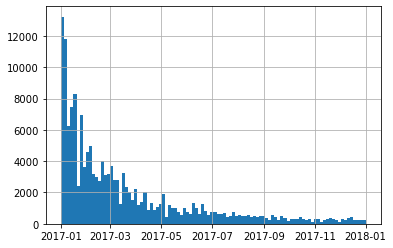

In [14]:
depart_date.hist(bins=100)

In [15]:
date_probs = pd.to_datetime(sirena.DepartDate, yearfirst=True).value_counts()
date_probs = date_probs / date_probs.sum()

same_date_prob = (date_probs ** 2).sum()
print(
    f'Вероятность того, что два человека летели в один и тот же день\n'
    f'при условии сэмплирования дней из распределения, данного нам в ощущениях: {same_date_prob * 100:.3} %'
)

Вероятность того, что два человека летели в один и тот же день
при условии сэмплирования дней из распределения, данного нам в ощущениях: 0.958 %


__По сути, это верхняя граница для статистической значимости полученного нами результата.__

Настоящая статзначимость, на самом деле, ещё меньше, поскольку обе персоны прибыли в один и тот же аэропорт. Вероятность подобного события с учётом прибытия в один и тот же день ещё меньше.

По-хорошему, здесь также необходимо сделать поправку на множественную проверку гипотез, но учитывая что до этого я протестировал всего 2 гипотезы, повышение `P-value` в результате этой процедуры можно считать незначительным.